In [1]:
# Authors: Samantha Tetef and Vikram Kashyap
# Date: Winter 2020-2021 to Summer 2021

In [2]:
import warnings
warnings.filterwarnings("ignore")

import utils as u
from importlib import reload
# to reload utils, run:
u = reload(u)

import os
import copy
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import mplcursors

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from pathlib import Path

import webbrowser

warnings.filterwarnings("ignore")

C:\Users\saman\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\saman\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [4]:
ROOTDIR = Path()

CIDdir = ROOTDIR/"ProcessedData"
Listdir = ROOTDIR/"Categories"

XES_DATA = u.get_Data(Listdir, mode='xes')
XANES_DATA = u.get_Data(Listdir, mode='xanes')

CIDS = np.array(u.get_Property(XES_DATA, 'CID'))
compoundtypes = u.get_Property(XES_DATA, 'Type')
compoundclasses = u.get_Property(XES_DATA, 'Class')

In [5]:
np.sum(np.array(compoundtypes)==6)

182

In [25]:
num = 0
for i, Type in enumerate(compoundtypes):
    if Type==6:
        print(CIDS[i])
        num += 1
    if num == 10:
        break

57128894
16688114
668
53704103
1034
140936
151197
186
127766
129748379


In [6]:
xes = np.array(u.get_Property(XES_DATA, 'Spectra'))
XESenergy = xes[0,0,:]
XES = xes[:,1,:]

XES_SCALING = np.max(XES)
XES = XES / XES_SCALING

In [7]:
xanes = np.array(u.get_Property(XANES_DATA, 'Spectra'))
XANESenergy = xanes[0,0,:]
XANES = xanes[:,1,:]

XANES_SCALING = np.max(XANES)
XANES = XANES / XANES_SCALING

### Check calulcations

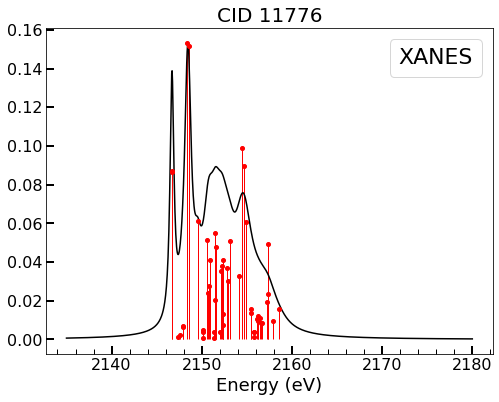

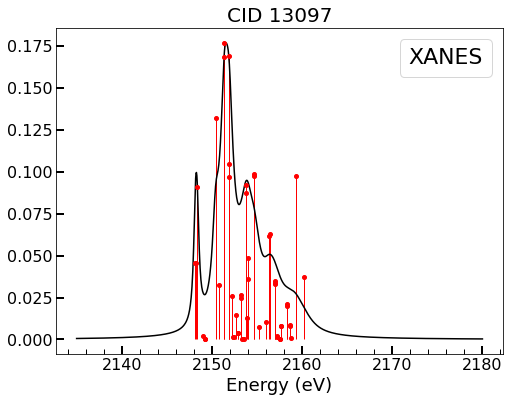

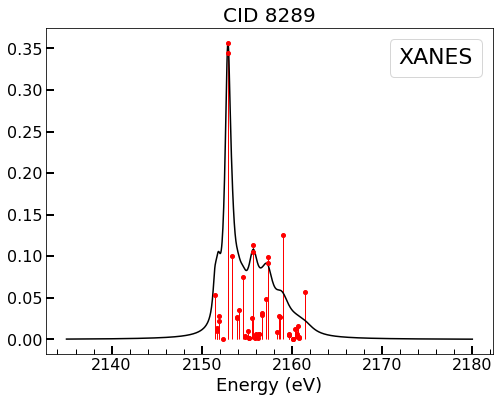

In [8]:
mycids = [11776, 13097, 8289]
for cid in mycids:
    
    i = np.where(CIDS==cid)[0][0]
    
#     trans = XES_DATA[i]['Transitions']
#     trans = esnip(trans, XES[i], mode='xes', emin=2100)
#     u.plot_spectrum_and_trans([XESenergy, XES[i]], trans, f'{CIDS[i]}', label='VtC-XES')
    
    trans = XANES_DATA[i]['Transitions']
    trans = u.esnip(trans, XANES[i], energy=XANESenergy, mode='xanes')
    u.plot_spectrum_and_trans([XANESenergy, XANES[i]], trans, f'{CIDS[i]}', label='XANES')

#     u.plot_spectrum([XESenergy, XES[i]], f'{CIDS[i]}', label='VtC-XES')
#     u.plot_spectrum([XANESenergy, XANES[i]], f'{CIDS[i]}', label='XANES')


# Theory and Experiment Comparison

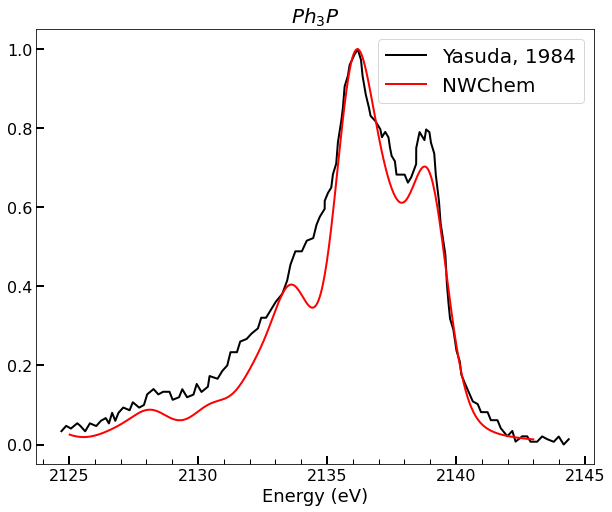

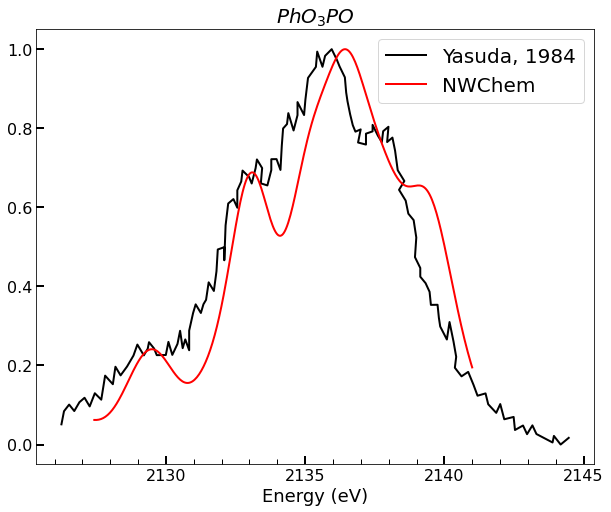

In [9]:
df1 = pd.read_csv('Ph3P.csv')
df2 = pd.read_csv('Ph3PO.csv')
df3 = pd.read_csv('PhO3PO.csv')

hc = 1.23984193e-6 #ev/m
d = 6.5327e-10 #m
def to_energy(two_theta):
    return hc/(d*np.sin(two_theta*(np.pi/180)/2))


def stack_plot(Spectrums, Labels, title=None,
               verbose=True, label=None, peaknorm=True):
    
    n = len(Spectrums)
    Colors=plt.cm.viridis(np.arange(n)/(n+1))
    if n == 2:
        Colors=['black', 'red']
    fig, ax = plt.subplots(figsize=(10,8))

    i = 0
    for spectrum in Spectrums:
        x, y = spectrum
        if peaknorm:
            y = y/np.max(y)
        ax.plot(x, y, '-', color=Colors[i], linewidth=2, label=Labels[i])
        i += 1

    if title is not None:
        plt.title(title, fontsize=20)
    plt.xlabel('Energy (eV)', fontsize=18)
    plt.tick_params(labelsize=16)

    if verbose:
        ax.xaxis.set_major_locator(MultipleLocator(5))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.tick_params(direction='in', width=1, length=5, which='minor')

    ax.tick_params(direction='in', width=2, length=8, which='major')

    plt.legend(fontsize=20)
    
    plt.show()

    
####################### spectrum 1
x = to_energy(df1['2theta'].values)
y = df1['I'].values
y = y - np.min(y)
y = y/np.max(y)
emin, emax = 350, 800
x2 = XESenergy[emin:emax]
i = np.where(CIDS==mycids[0])[0][0]
y2 = XES[i][emin:emax]
e_shift = x2[np.argmax(y2)] - x[np.argmax(y)]
stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$Ph_3P$")

####################### spectrum 2
x = to_energy(df3['2theta'].values)
y = df3['I'].values
y = y - np.min(y)
y = y/np.max(y)
emin, emax = 410, 750
x2 = XESenergy[emin:emax]
i = np.where(CIDS==mycids[2])[0][0]
y2 = XES[i][emin:emax]
stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$PhO_3PO$", verbose=True)

# ML and Data Science section

## All Spectra Together

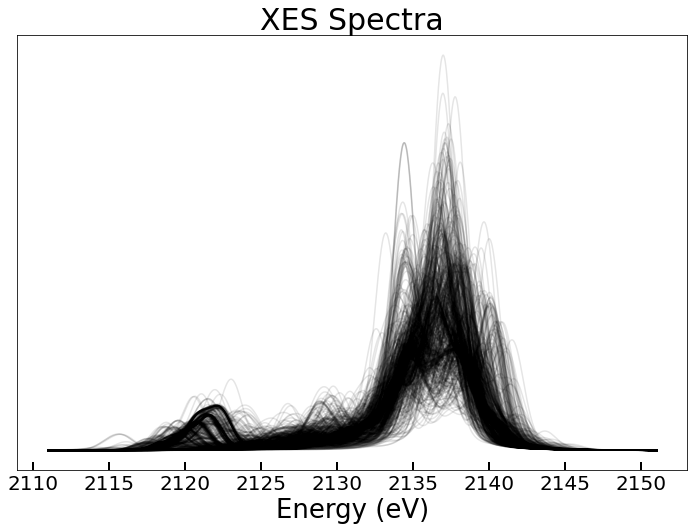

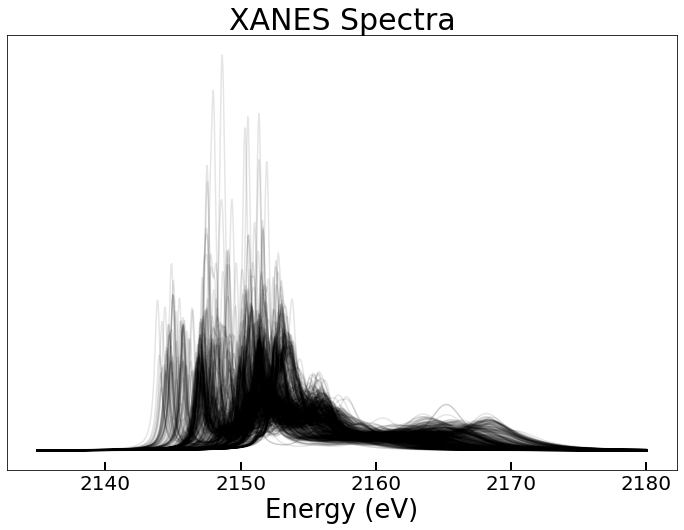

In [10]:
def Spagetti_plot(energy, X, mode='XES', MINIMAX=[0,-1]):
    
    MIN, MAX = MINIMAX
    
    fig, ax = plt.subplots(figsize=(12,8))
    
    for x in X:
        plt.plot(energy, x, '-', c='k', alpha=0.1)
                
    plt.title(f"{mode} Spectra", fontsize=30)
    
    plt.xlabel('Energy (eV)', fontsize=26)
    plt.xticks(fontsize=20)
    ax.tick_params(direction='in', width=2, length=8)
    plt.yticks([])

    plt.show()
    
Spagetti_plot(XESenergy, XES, mode='XES')
Spagetti_plot(XANESenergy, XANES, mode='XANES')

## Rainbow Spaghetti Plot: Color and Stack by Compound Type

In [11]:
def Rainbow_spaghetti_plot_types_stack(subplot, energy, X, types, mode='VtC-XES', MINIMAX=[0,-1]):
    mn, mx = MINIMAX
    
    fig, ax = subplot
    
    lines = []
    for x,cid,moltype in zip(X,CIDS,types):
        bin_num = u.TYPE_DICT[moltype]
        lines.append(plt.plot(energy[mn:mx], x[mn:mx] + bin_num, '-', color=plt.cm.viridis(bin_num*50), alpha=0.1,\
                              label=(str(cid)+','+str(moltype)))[0])
        
    plt.title(f"{mode} Spectra", fontsize=30)
    
    plt.xlabel('Energy (eV)', fontsize=26)
    ax.tick_params(direction='in', width=2, length=8)
    plt.xticks(fontsize=20)
    
    if mode == 'XANES' or mode == 'XES':
        ax.xaxis.set_minor_locator(MultipleLocator(2))
        ax.xaxis.set_major_locator(MultipleLocator(10))
    
    ax.tick_params(direction='in', width=2, length=10, which='major')
    ax.tick_params(direction='in', width=1, length=8, which='minor')
    plt.yticks([])
    
    '''
    mplcursors.cursor(lines, highlight=True, \
                      highlight_kwargs={'color':'pink', 'alpha':1, 'linewidth':3, 'markeredgewidth':0})
                     #.connect("add", lambda sel: webbrowser.open(f"https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?cid={CIDS[sel.target.index]}&t=l"))
    '''
    
    plt.show()
    
    return lines

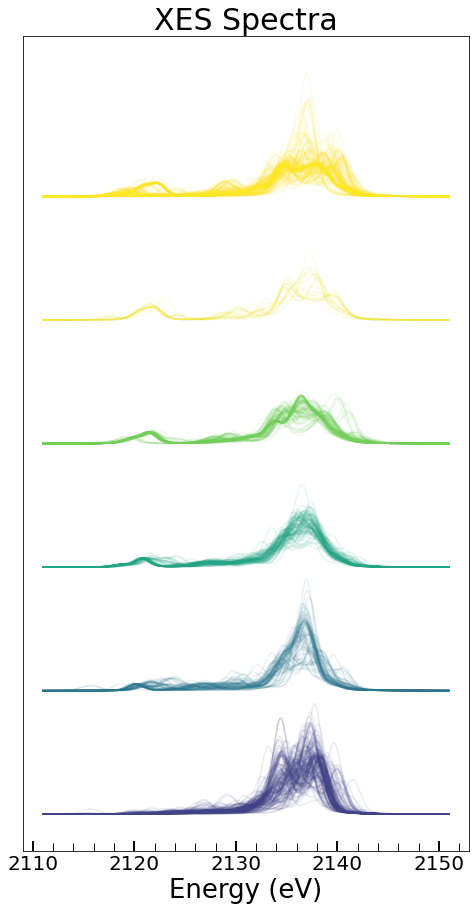

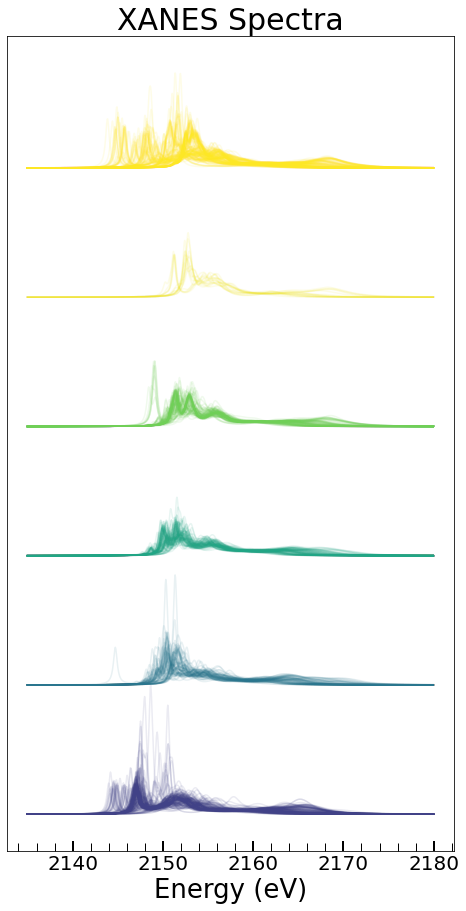

In [12]:
Rainbow_spaghetti_plot_types_stack(plt.subplots(figsize=(8,15)), XESenergy, XES, compoundclasses, mode='XES');
Rainbow_spaghetti_plot_types_stack(plt.subplots(figsize=(8,15)), XANESenergy, XANES, compoundclasses, mode='XANES');

## ML Latent Space: PCA and T-SNE

In [13]:
warnings.filterwarnings("ignore")
# pca
pca1 = PCA(n_components=2)
XES_PCA = pca1.fit_transform(XES)

# pca
pca2 = PCA(n_components=2)
XANES_PCA = pca2.fit_transform(XANES)

# tsne
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
XES_TSNE = tsne.fit_transform(XES)

# tsne
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
XANES_TSNE = tsne.fit_transform(XANES)

In [14]:
def onselect(sel):
    sel.annotation.set_text( \
    str(CIDS[sel.target.index])+','+str(compoundclasses[sel.target.index]))
    webbrowser.open(f"https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?cid={CIDS[sel.target.index]}&t=l")
        

def plot_dim_red(plot, X_red, types, method, fontsize=16, mode='VtC-XES'):

    fig, ax = plot
        
    '''
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    '''
    
    colors = [u.TYPE_DICT[t]*50 for t in types]
    
    dots = plt.scatter(X_red[:, 0], X_red[:, 1], c=colors)
    
    plt.xticks(fontsize=fontsize+3)
    plt.yticks(fontsize=fontsize+3)
    
    ax.set_xlabel(f"{method} [0]", fontsize=fontsize+6)
    ax.set_ylabel(f"{method} [1]", fontsize=fontsize+6)
    ax.tick_params(direction='in', width=2, length=8)
    
    legend = ax.legend([f'{mode}:\n{method}'], handlelength=0, handletextpad=0,
                           fancybox=True, fontsize=22)
    for item in legend.legendHandles:
        item.set_visible(False)
    
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
        
    plt.show()
    
    return dots

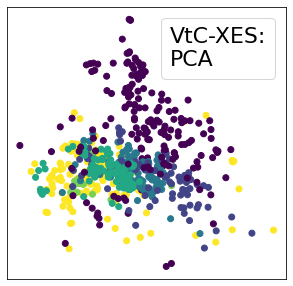

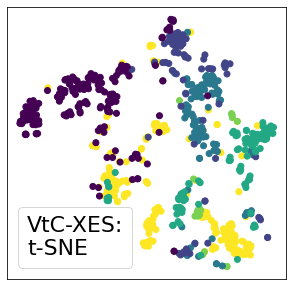

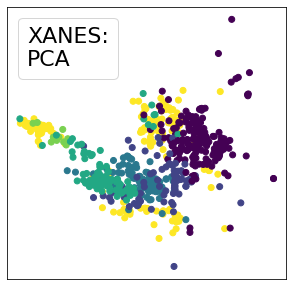

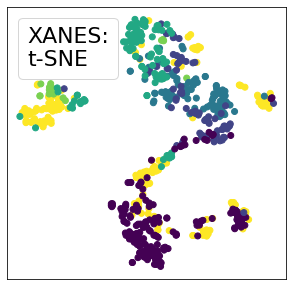

<function __main__.onselect(sel)>

In [15]:
%matplotlib inline
mplcursors.cursor(plot_dim_red(plt.subplots(figsize=(5,5)), XES_PCA, compoundclasses, 'PCA')).connect("add", onselect)
mplcursors.cursor(plot_dim_red(plt.subplots(figsize=(5,5)), XES_TSNE,compoundclasses, 't-SNE')).connect("add", onselect)
mplcursors.cursor(plot_dim_red(plt.subplots(figsize=(5,5)), XANES_PCA, compoundclasses, 'PCA', mode='XANES')).connect("add", onselect)
mplcursors.cursor(plot_dim_red(plt.subplots(figsize=(5,5)), XANES_TSNE, compoundclasses, 't-SNE', mode='XANES')).connect("add", onselect)

## Spectra + Latent Space Combined

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


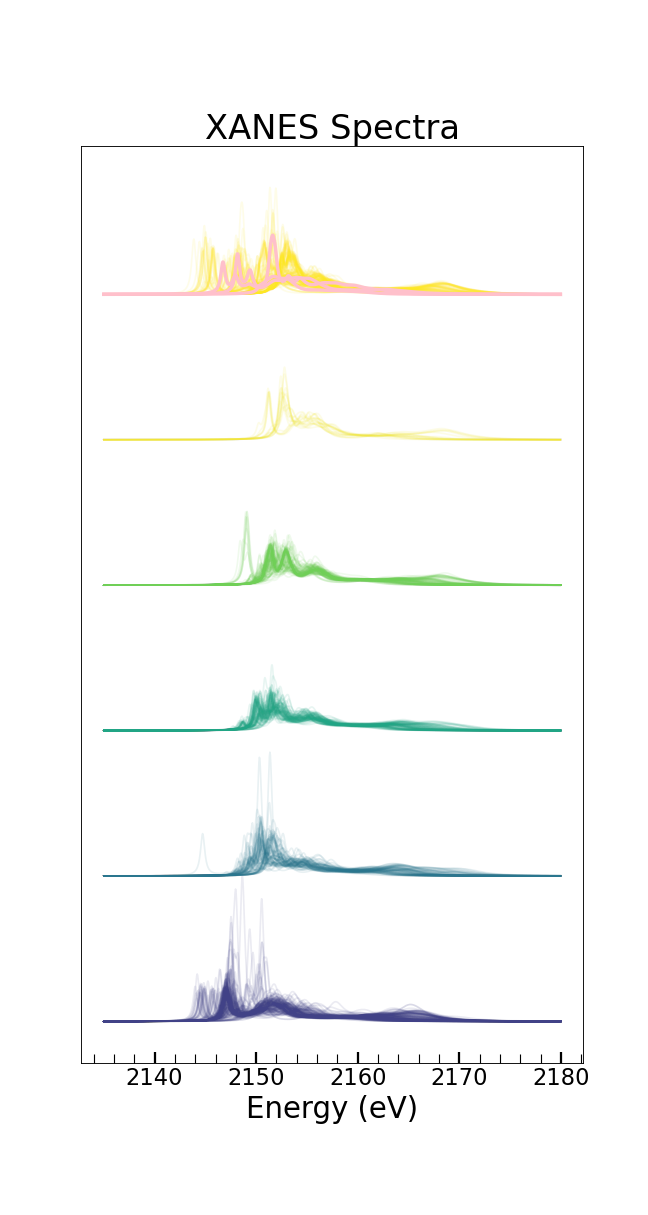

<IPython.core.display.Javascript object>


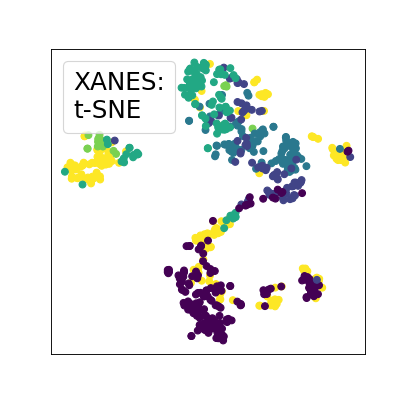

<function __main__.highlight_dot(sel)>

In [22]:
linktopubchem = True

oldlineprops = {}

def highlight_spectra(sel):
    sel.annotation.set_text( \
        str(CIDS[sel.target.index])+','+str(compoundclasses[sel.target.index]))
    if oldlineprops:
        spectra_lines[oldlineprops['index']].set_linewidth(oldlineprops['linewidth'])
        spectra_lines[oldlineprops['index']].set_color(oldlineprops['color'])
        spectra_lines[oldlineprops['index']].set_alpha(oldlineprops['alpha'])
    oldlineprops['index'] = sel.target.index
    oldlineprops['linewidth'] = spectra_lines[sel.target.index].get_lw()
    oldlineprops['color'] = spectra_lines[sel.target.index].get_c()
    oldlineprops['alpha'] = spectra_lines[sel.target.index].get_alpha()
    spectra_lines[sel.target.index].set_linewidth(3)
    spectra_lines[sel.target.index].set_color('red')
    spectra_lines[sel.target.index].set_alpha(1)
    if linktopubchem: webbrowser.open(f"https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?cid={CIDS[sel.target.index]}&t=l")

def unhighlight_spectra(sel):
    spectra_lines[sel.target.index].set_linewidth(oldlineprops['linewidth'])
    spectra_lines[sel.target.index].set_color(oldlineprops['color'])
    spectra_lines[sel.target.index].set_alpha(oldlineprops['alpha'])
        

olddotprops = {}

def highlight_dot(sel):
    #sel.annotation.set_text(str(CIDS[sel.target.index])+' '+str(types[sel.target.index]))
    if olddotprops:
        redspace_dots.set_edgecolors(olddotprops['colors'])
    olddotprops['colors'] = copy.deepcopy(redspace_dots.get_edgecolors())
    newdotedgecolors = copy.deepcopy(olddotprops['colors'])
    #webbroswer.open(str(len(olddotedgecolors)))
    #webbrowser.open(repr(sel.artist.get_label().split(',')[0]))
    index = CIDS.index(int(sel.artist.get_label().split(',')[0]))
    newdotedgecolors[index] = [1,0,0,1]
    redspace_dots.set_edgecolors(newdotedgecolors)
    if linktopubchem: webbrowser.open(f"https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?cid={CIDS[index]}&t=l")


def unhighlight_dot(sel):
    webbrowser.open('test')
    redspace_dots.set_edgecolors(olddotprops['colors'])
    
spectra_lines = Rainbow_spaghetti_plot_types_stack(plt.subplots(figsize=(8,15)), XANESenergy, XANES, compoundclasses, mode='XANES')
redspace_dots = plot_dim_red(plt.subplots(figsize=(5,5)), XANES_TSNE, compoundclasses, 't-SNE', mode='XANES')

dotcursor = mplcursors.cursor(redspace_dots)
dotcursor.connect("add", highlight_spectra)
#dotcursor.connect("remove", unhighlight_spectra)

linecursor = mplcursors.cursor(spectra_lines, highlight=True,
                  highlight_kwargs={'color':'pink', 'alpha':1, 'linewidth':3, 'markeredgewidth':0})
linecursor.connect("add", highlight_dot)
#linecursor.connect("remove", unhighlight_dot)

In [23]:
# Uncomment and run the line below to stop it linking to PubChem when you click on the figures
# linktopubchem = True

In [19]:
# spectra_lines = Rainbow_spaghetti_plot_types_stack(plt.subplots(figsize=(8,15)), XESenergy, XES, compoundclasses, mode='XES')
# redspace_dots = plot_dim_red(plt.subplots(figsize=(5,5)), XES_TSNE, compoundclasses, 't-SNE', mode='XES')

# dotcursor = mplcursors.cursor(redspace_dots)
# dotcursor.connect("add", highlight_spectra)
# #dotcursor.connect("remove", unhighlight_spectra)

# linecursor = mplcursors.cursor(spectra_lines, highlight=True,
#                   highlight_kwargs={'color':'pink', 'alpha':1, 'linewidth':3, 'markeredgewidth':0})
# linecursor.connect("add", highlight_dot)